In [26]:
import pandas as pd
import numpy as np
import re
%matplotlib inline
import nltk

In [14]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/skathirmani/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
url = 'https://github.com/skathirmani/datasets/raw/master/narendramodi_tweets.csv'
tweets = pd.read_csv(url)
tweets.head(2)

,id,retweets_count,favorite_count,created_at,text,lang,retweeted,followers_count,friends_count,hashtags_count,description,location,background_image_url,source
0,8.263846e+17,1406.0,4903.0,2017-01-31 11:00:07,The President's address wonderfully encapsulat...,en,False,26809964.0,1641.0,1.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
1,8.263843e+17,907.0,2877.0,2017-01-31 10:59:12,Rashtrapati Ji's address to both Houses of Par...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client


In [4]:
rows_words = tweets['text'].str.lower().str.split('\s').values.tolist()
len(rows_words)

3220

In [6]:
words_all = []

for row in rows_words:
    words_all.extend(row)
len(words_all)

57362

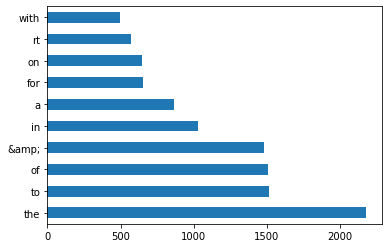

In [11]:
words_freq = pd.Series(words_all).value_counts()
words_freq.head(10).plot.barh()

In [23]:
stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend(['rt', '&amp;', ''])
len(stopwords)

182

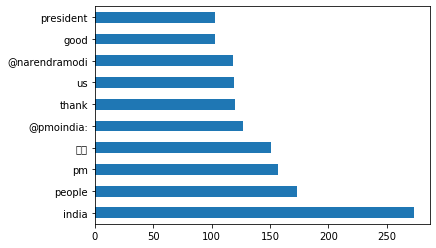

In [24]:
words_freq[~words_freq.index.isin(stopwords)].head(10).plot.barh()

In [25]:
## Top 10 hashtags along with their frequency

In [31]:
text = tweets.loc[0, 'text']
text

"The President's address wonderfully encapsulated India's strengths, aspirations, potential &amp; the efforts towards #TransformingIndia."

In [42]:
re.sub('[a-z]', '', text) # Remove all lower case alphabets

"T P'    I' , ,  &;    #TI."

In [43]:
re.sub('[a-zA-Z]', '', text) # Remove all lower & upper case alphabets

" '    ' , ,  &;    #."

In [44]:
# regular expression pattern, replacement character, input string
re.sub('[a-zA-Z\s]', '', text) # Remove all lower & upper case alphabets, spaces

"'',,&;#."

In [47]:
re.sub('[^a-zA-Z\s#]', '', text) # Retain alphabets & spaces

'The Presidents address wonderfully encapsulated Indias strengths aspirations potential amp the efforts towards #TransformingIndia'

In [46]:
text

"The President's address wonderfully encapsulated India's strengths, aspirations, potential &amp; the efforts towards #TransformingIndia."

In [57]:
re.findall('#[a-zA-Z0-9]+', text)

['#TransformingIndia']

In [53]:
re.findall('#[a-zA-Z0-9]+', text) # Find/Extract sequence of alphabets

['#TransformingIndia']

In [66]:
rows_tags = tweets['text'].str.findall('#[a-zA-Z0-9]+').values.tolist()

hashtags = []
for row in rows_tags:
    hashtags.extend(row)
hashtags_freq = pd.Series(hashtags).value_counts()

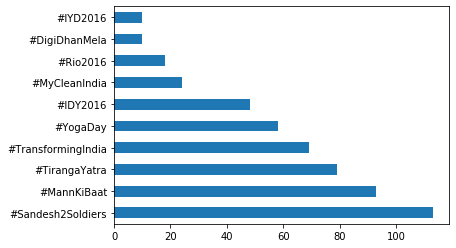

In [68]:
hashtags_freq.head(10).plot.barh()

In [70]:
# Line chart for frequency of the hashtag #TransformingIndia monthwise

In [72]:
# Dec-2016 how many hashtag #TransformingIndia

In [75]:
tweets['date'] = pd.to_datetime(tweets['created_at'],
                               format="%Y-%m-%d %H:%M:%S")

In [82]:
tweets['year'] = tweets['date'].dt.year
tweets['month'] = tweets['date'].dt.month
tweets['year_month'] = tweets['year'].astype(str) + '_' + tweets['month'].astype(str)
tweets['year_month']

0       2017_1
1       2017_1
2       2017_1
3       2017_1
4       2017_1
         ...  
3215    2016_3
3216    2016_3
3217    2016_3
3218    2016_3
3219    2016_3
Name: year_month, Length: 3220, dtype: object

In [92]:
#strptime
tweets['year_month'] = tweets['date'].dt.strftime('%Y_%m')
tweets['year_month'].head()

0    2017_01
1    2017_01
2    2017_01
3    2017_01
4    2017_01
Name: year_month, dtype: object

In [ ]:
# Dec-2016 how many hashtag #TransformingIndia
#year_month = "2016_12"

In [99]:
subset = tweets[tweets['year_month']=='2016_09']
rows_tags = subset['text'].str.findall('#TransformingIndia').values.tolist()
hashtags = []
for row in rows_tags:
    hashtags.extend(row)
hashtags_freq = pd.Series(hashtags).value_counts()
hashtags_freq

#TransformingIndia    2
dtype: int64

In [103]:
#text = 'I Like #datascience'
#'#DATAscience' in text

In [105]:
check_hashtag = lambda tweet: 1 if '#TransformingIndia' in tweet else 0
tweets['TransformingIndia'] = tweets['text'].apply(check_hashtag)

In [107]:
# Bar chart for frequency of the hashtag #TransformingIndia monthwise

In [116]:
#tweets.groupby(['year_month']).agg(
#    {'TransformingIndia': sum})['TransformingIndia'].plot.line()

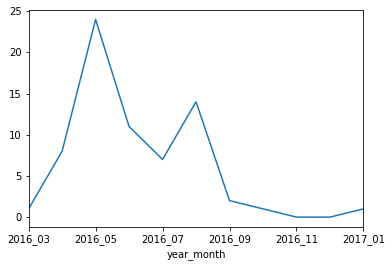

In [112]:
tweets.groupby(['year_month'])['TransformingIndia'].sum().plot.line()

## Group by

In [118]:
grouped = tweets.groupby(['year_month'])
len(grouped)

11

In [124]:
from IPython.display import display, HTML
#for month, group in grouped:
#    display(group['TransformingIndia'].sum())

In [125]:
tweets.groupby(['year_month'])['TransformingIndia'].sum()

year_month
2016_03     1
2016_04     8
2016_05    24
2016_06    11
2016_07     7
2016_08    14
2016_09     2
2016_10     1
2016_11     0
2016_12     0
2017_01     1
Name: TransformingIndia, dtype: int64

### Data science jobs analysis

In [134]:
url = 'https://github.com/skathirmani/datasets/raw/master/naukri_jobs_datascience.csv'
jobs = pd.read_csv(url)
jobs['experience'] = jobs['experience'].fillna('0-0 yrs')
#jobs.head()

In [153]:
jobs.head(2)

,id,title,location,experience,skills,company,salary,description,posted_date,type,url,min_exp,max_exp
0,280918001664,Data Science,Mumbai,2-4 yrs,"Algorithms, Machine Learning, Python, Java, Da...",Netcore Solutions Pvt Ltd,"2,00,000 - 7,00,000 P.A.",At least 2 year of experience in data engineer...,1 day ago,hotjob,https://www.naukri.com/job-listings-Data-Scien...,2,4
1,280818003404,Analyst / Sr. Analyst (data Science),Gurgaon,5-8 yrs,"predictive modeling, predictive analytics, mac...",Cvent India Pvt. Ltd.,"5,00,000 - 10,00,000 P.A.",Strong experience on providing predictive mode...,Today,hotjob,https://www.naukri.com/job-listings-Analyst-Sr...,5,8


In [130]:
# Create a new column for minimum experience required
# Create a new column for max experience required

In [138]:
jobs['min_exp'] = jobs['experience'].apply(
    lambda v: v.split('-')[0]).astype(int)

In [142]:
jobs['min_exp'] = jobs['experience'].str.split('-').str[0].astype(int)

In [152]:
jobs['max_exp'] = jobs['experience'].str.split('-').str[1].str.split(' ').str[0]

In [ ]:
#re.sub
#str.replace

#re.findall
#str.findall

#### Exercise

In [156]:
# Filter for only those rows which following the pattern
# sequence of numbers - sequence of numbers P.A

# Then extract min & max salary as new columns

In [ ]:
## groupby, to_datetime, filtering, re, str, dt

### Corona Analysis

In [162]:
url = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
confirmed = pd.read_csv(url)
confirmed.shape

(266, 221)

In [163]:
confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,37596,37599,37599,37599,37856,37894,37953,37999,38054,38070
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,7380,7499,7654,7812,7967,8119,8275,8427,8605,8759
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,38583,39025,39444,39847,40258,40667,41068,41460,41858,42228
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,989,1005,1005,1024,1024,1045,1045,1045,1060,1060
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1906,1935,1966,2015,2044,2068,2134,2171,2222,2283


In [ ]:
# Total cases in India so far

In [167]:
columns=confirmed.columns.tolist()

In [168]:
confirmed[confirmed['Country/Region'] == 'India'][columns[-1]]

143    3224547
Name: 8/25/20, dtype: int64

In [172]:
confirmed[confirmed['Country/Region'] == 'India'].values[0][-1]

3224547

In [174]:
confirmed[confirmed['Country/Region'] == 'India'][columns[-1]].values[0]

3224547

In [175]:
#loc & iloc

In [176]:
# no. of cases confirmed in India during Apr-2020
# calculate absolute cases daywise for India in the month of Apr-2020

In [191]:
sample_df = pd.DataFrame({
    'A':['a','b','c'],
    'Chennai': [1,2,3],
    'Delhi': [10, 20, 30]
})
#sample_df
sample_df.melt(id_vars=['A']).rename(columns={'variable': 'city'})

In [185]:
cols_retain = ['Province/State', 'Country/Region', 'Lat', 'Long']
df_confirmed = confirmed.melt(id_vars=cols_retain)
df_confirmed = df_confirmed.rename(columns={'variable': 'Date',
                                            'value': 'confirmed'})
df_confirmed.head()

,Province/State,Country/Region,Lat,Long,Date,confirmed
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0
1,NaN,Albania,41.15330,20.168300,1/22/20,0
2,NaN,Algeria,28.03390,1.659600,1/22/20,0
3,NaN,Andorra,42.50630,1.521800,1/22/20,0
4,NaN,Angola,-11.20270,17.873900,1/22/20,0


In [187]:
confirmed.shape

(266, 221)

In [186]:
df_confirmed.shape

(57722, 6)

In [206]:
india = df_confirmed[df_confirmed['Country/Region'] == 'India']
#india.plot.line(x='Date', y='confirmed')

In [211]:
india['confirmed_absolute'] = india['confirmed'].diff()

/Users/skathirmani/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


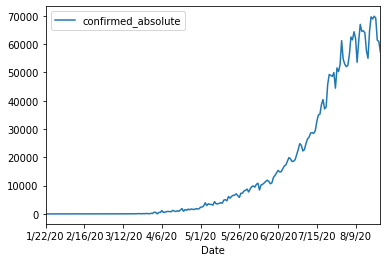

In [205]:
india.plot.line(x='Date', y='confirmed_absolute')

In [216]:
#india['confirmed_absolute'].rolling(window=7).mean().plot.line()

In [ ]:
## Monthwise total count

In [218]:
df_confirmed.head(2)

,Province/State,Country/Region,Lat,Long,Date,confirmed
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0
1,NaN,Albania,41.15330,20.168300,1/22/20,0


In [ ]:
# resample

In [222]:
df_confirmed['Date'] = pd.to_datetime(df_confirmed['Date'],
                                      format='%m/%d/%y')

india = df_confirmed[df_confirmed['Country/Region'] == 'India']
india['confirmed_abs'] = india['confirmed'].diff()

/Users/skathirmani/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [236]:
# Monthwise total number of confirmed cases
india.resample(on='Date', rule='3m')['confirmed_abs'].sum()

Date
2020-01-31          1.0
2020-04-30      34862.0
2020-07-31    1661125.0
2020-10-31    1528559.0
Freq: 3M, Name: confirmed_abs, dtype: float64

In [235]:
#india.resample(on='Date', rule='1m')['confirmed'].last()

### Excercises
- Jobs dataset
    - Filter for only those rows which following the pattern
    - sequence of numbers - sequence of numbers P.A
    - Then extract min & max salary as new columns
- Corona data
    - Top 10 countries with highest counts
    - No. days taken for each country to reach 50K